# 🔧 1. Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src")
from data_loader import load_data

# 📥 2. Load the Dataset

In [2]:
# Load data
df=load_data("../data/raw/MachineLearningRating_v3.csv")

# Quick look
df.shape
print(df.shape)

df.head()

/home/ablex/Development/AI/insurance-risk-analytics/notebooks/../src/data_loader.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,delimiter="|")


(1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# 🔍 3. Data Structure & Summary

In [3]:
# Summary of data types and missing values
df.info()

# Descriptive statistics for numeric columns
df.describe()

# Column names
df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

['UnderwrittenCoverID',
 'PolicyID',
 'TransactionMonth',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'CustomValueEstimate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'WrittenOff',
 'Rebuilt',
 'Converted',
 'CrossBorder',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims']

# 4. Data Quality Checks

In [4]:

# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percent of Total': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percent of Total', ascending=False)
missing_df


,Missing Count,Percent of Total
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


## Handle Missing Data

In [7]:
# Print current columns to debug
print("Current columns:", df.columns.tolist())

# Drop columns with excessive missing values if they exist
columns_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder']
existing_columns = [col for col in columns_to_drop if col in df.columns]
if existing_columns:
    df = df.drop(columns=existing_columns)
    print(f"Dropped columns: {existing_columns}")
else:
    print("No columns to drop from the specified list.")

# Impute low-missing categorical columns with mode
for col in ['AccountType', 'Gender', 'MaritalStatus']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert CapitalOutstanding to numeric, replacing commas with periods
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'].str.replace(',', '.'), errors='coerce')
df['CapitalOutstanding'] = df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].median())

# Investigate systematic missingness in vehicle-related columns
missing_vehicle_rows = df[['mmcode', 'VehicleType', 'make', 'VehicleIntroDate', 'NumberOfDoors', 
                          'bodytype', 'kilowatts', 'cubiccapacity', 'Cylinders', 'Model']].isnull().all(axis=1)
if missing_vehicle_rows.sum() == 552:
    df = df[~missing_vehicle_rows]

# For moderate missing columns, create missing indicators and impute
df['NewVehicle_missing'] = df['NewVehicle'].isnull().astype(int)
df['NewVehicle'] = df['NewVehicle'].fillna(df['NewVehicle'].mode()[0])
df['Bank_missing'] = df['Bank'].isnull().astype(int)
df['Bank'] = df['Bank'].fillna('Unknown')

# Re-run missing value check
missing = df.isnull().sum()
print("Remaining missing values:\n", missing[missing > 0])

Current columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
No columns to drop from the specified list.


/tmp/ipykernel_18825/815746101.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewVehicle_missing'] = df['NewVehicle'].isnull().astype(int)
/tmp/ipykernel_18825/815746101.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewVehicle'] = df['NewVehicle'].fillna(df['NewVehicle'].mode()[0])
/tmp/ipykernel_18825/815746101.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Remaining missing values:
 CustomValueEstimate    779090
WrittenOff             641349
Rebuilt                641349
Converted              641349
dtype: int64


# 📊 5. Univariate Analysis

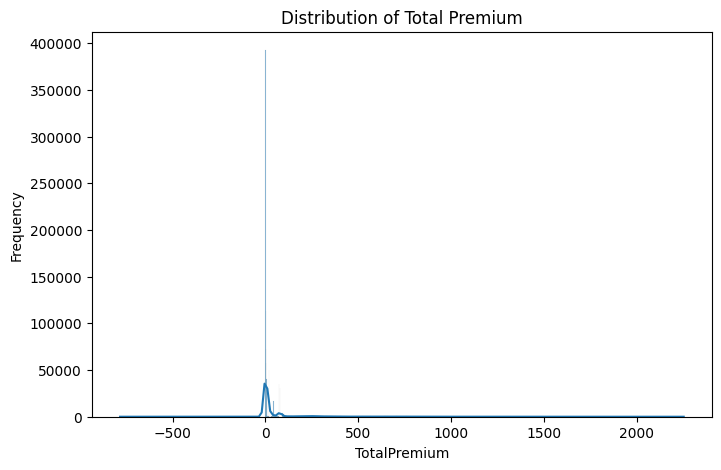

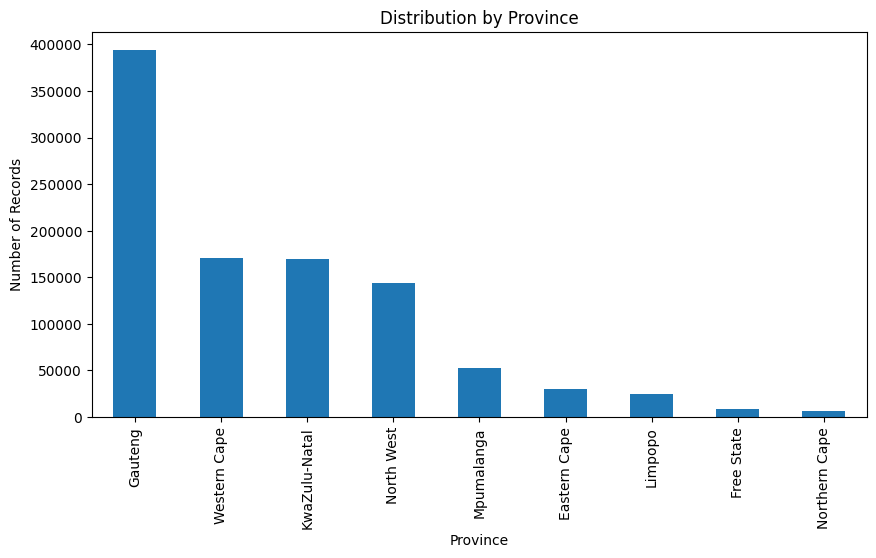

In [8]:

# Histogram of Total Premium
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalPremium'], kde=True)
plt.title('Distribution of Total Premium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

# Bar chart of categorical variable - Province
plt.figure(figsize=(10, 5))
df['Province'].value_counts().plot(kind='bar')
plt.title('Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Number of Records')
plt.show()

# 🔗 6. Bivariate Analysis

/tmp/ipykernel_18825/296503324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


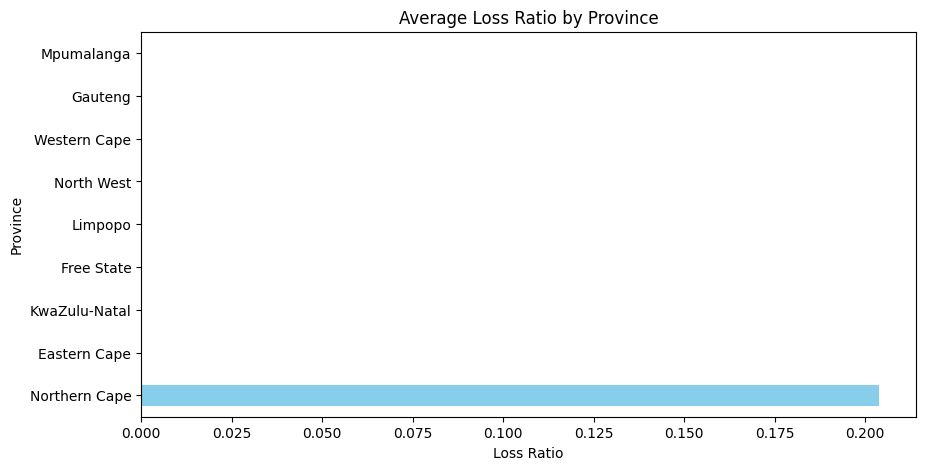

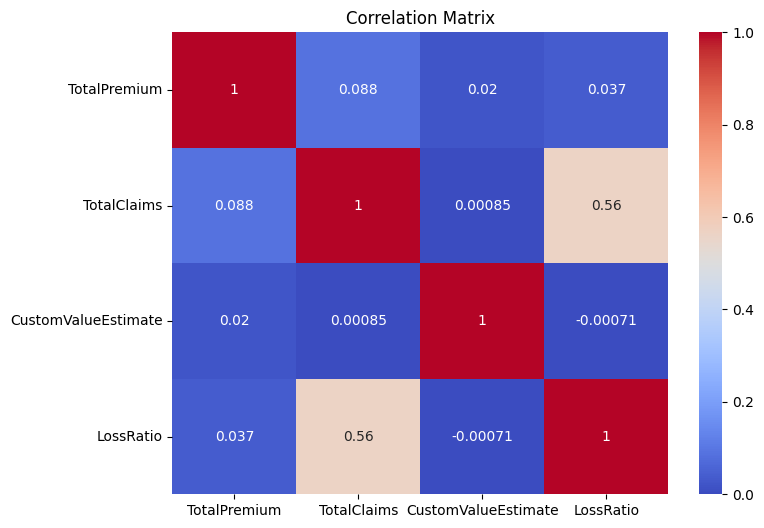

In [9]:

# Create Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Province
loss_by_province = df.groupby('Province')['LossRatio'].mean().sort_values()
plt.figure(figsize=(10, 5))
loss_by_province.plot(kind='barh', color='skyblue')
plt.title('Average Loss Ratio by Province')
plt.xlabel('Loss Ratio')
plt.ylabel('Province')
plt.show()

# Correlation Matrix
corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ⏳ 7. Temporal Trend Analysis

/tmp/ipykernel_18825/2481261948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')


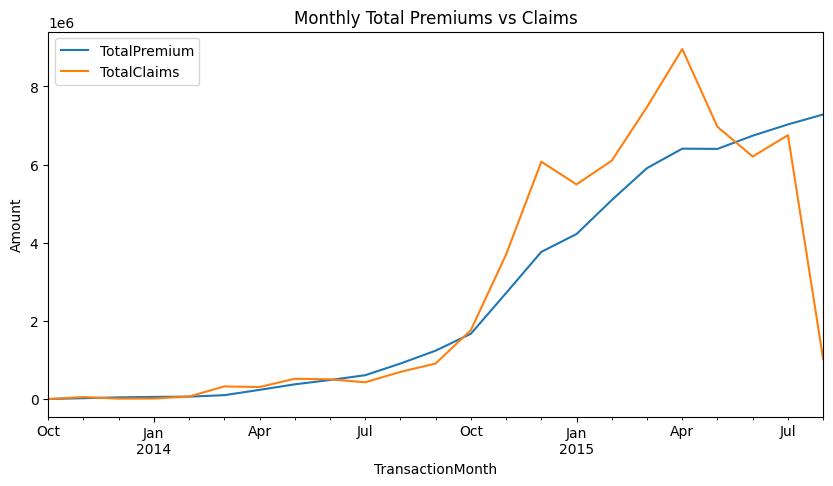

In [10]:

# Convert TransactionMonth to datetime
try:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
except:
    print("TransactionMonth format needs manual parsing.")

monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
})

monthly.plot(figsize=(10, 5), title='Monthly Total Premiums vs Claims')
plt.ylabel('Amount')
plt.show()

## 8. Vehicle Make & Claim Risk

/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


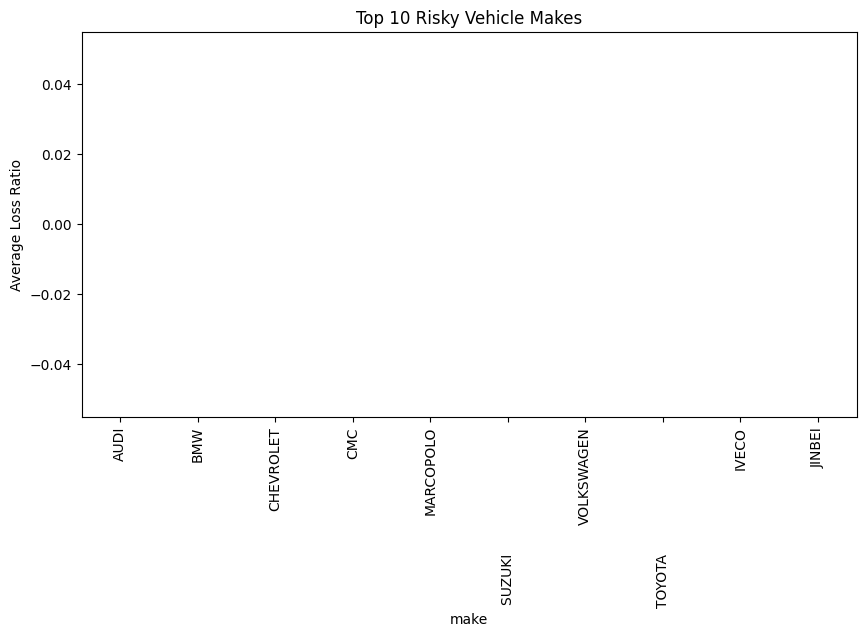

In [11]:
# Top 10 risky makes
risky_makes = df.groupby('make')['LossRatio'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
risky_makes.plot(kind='bar', color='red')
plt.title('Top 10 Risky Vehicle Makes')
plt.ylabel('Average Loss Ratio')
plt.show()


## 9. Outlier Detection

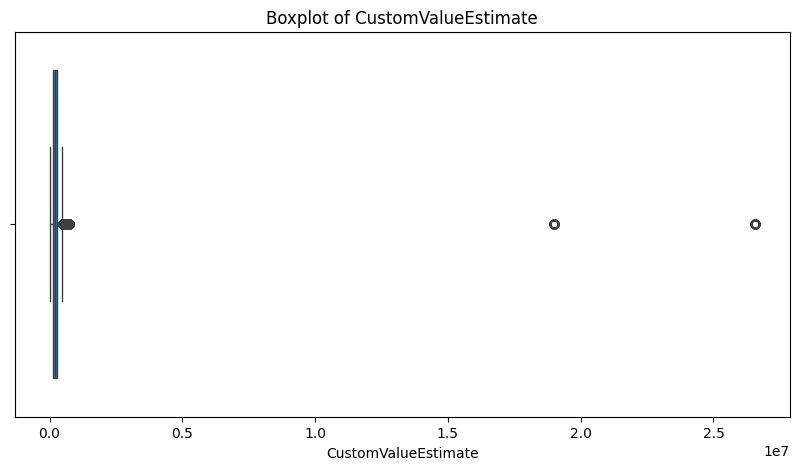

Outliers in CustomValueEstimate: 1785 records
       CustomValueEstimate
count         1.785000e+03
mean          2.198579e+06
std           5.858076e+06
min           5.000000e+05
25%           5.214500e+05
50%           5.950230e+05
75%           6.472920e+05
max           2.655000e+07
--------------------------------------------------


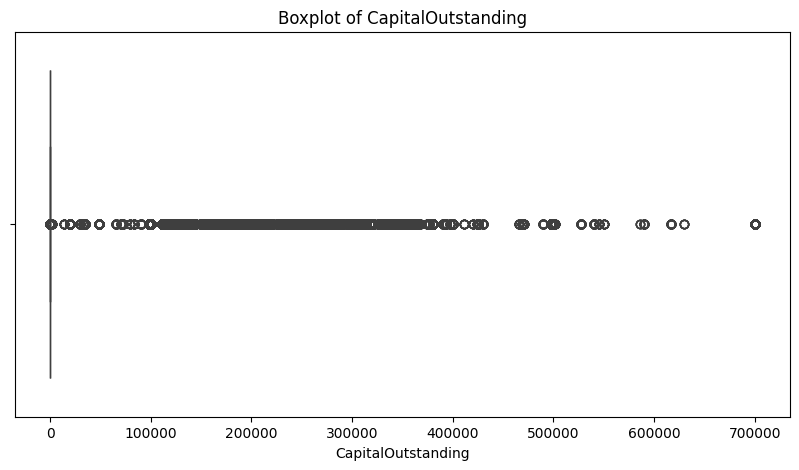

Outliers in CapitalOutstanding: 36978 records
       CapitalOutstanding
count        36978.000000
mean        230168.389610
std         100523.194379
min             -2.000000
25%         160000.000000
50%         229900.000000
75%         280000.000000
max         700000.000000
--------------------------------------------------


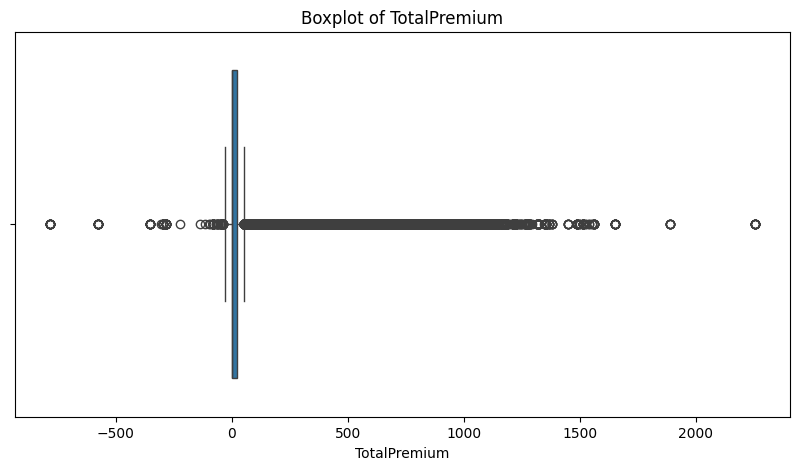

Outliers in TotalPremium: 208966 records
        TotalPremium
count  208966.000000
mean      277.219953
std       242.339971
min      -782.576754
25%        78.947368
50%       198.496297
75%       380.696754
max      2253.507281
--------------------------------------------------


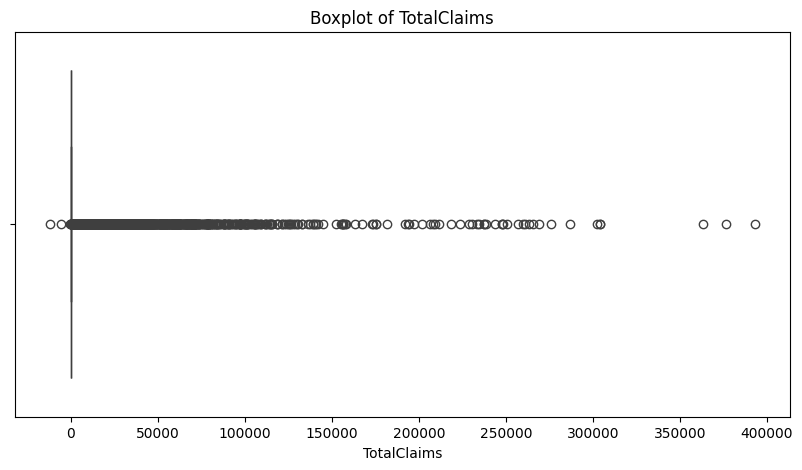

Outliers in TotalClaims: 2780 records
         TotalClaims
count    2780.000000
mean    23133.402948
std     38544.455266
min    -12002.412281
25%      1650.000000
50%      6140.350877
75%     30358.741228
max    393092.105263
--------------------------------------------------


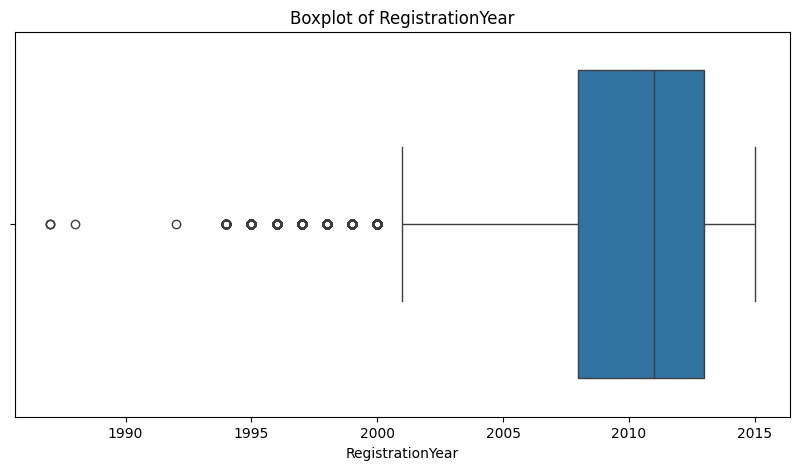

Outliers in RegistrationYear: 7482 records
       RegistrationYear
count       7482.000000
mean        1998.129377
std            1.574881
min         1987.000000
25%         1997.000000
50%         1998.000000
75%         1999.000000
max         2000.000000
--------------------------------------------------


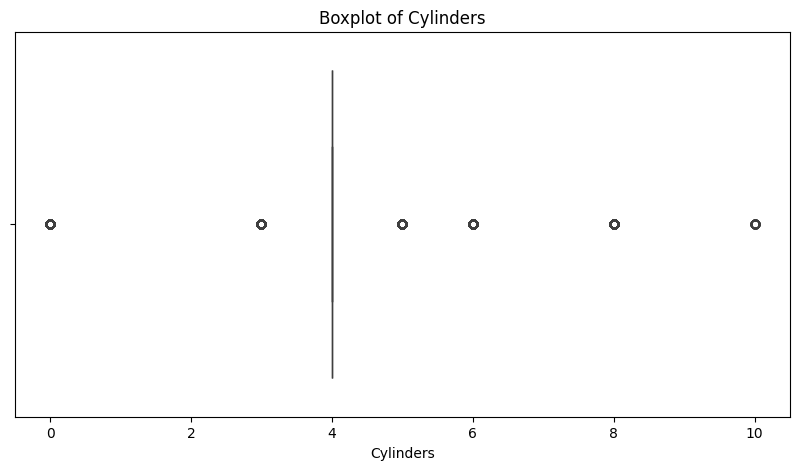

Outliers in Cylinders: 34262 records
          Cylinders
count  34262.000000
mean       5.360720
std        0.856692
min        0.000000
25%        5.000000
50%        5.000000
75%        6.000000
max       10.000000
--------------------------------------------------


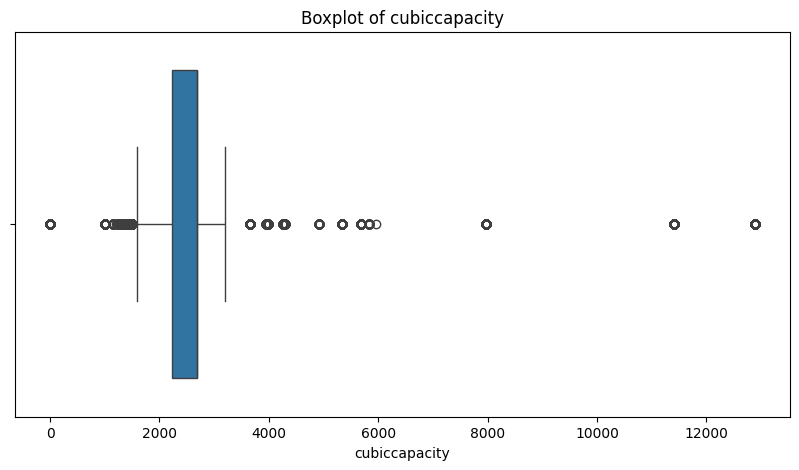

Outliers in cubiccapacity: 56939 records
       cubiccapacity
count   56939.000000
mean     1533.191907
std      1227.580600
min         0.000000
25%      1298.000000
50%      1330.000000
75%      1495.000000
max     12880.000000
--------------------------------------------------


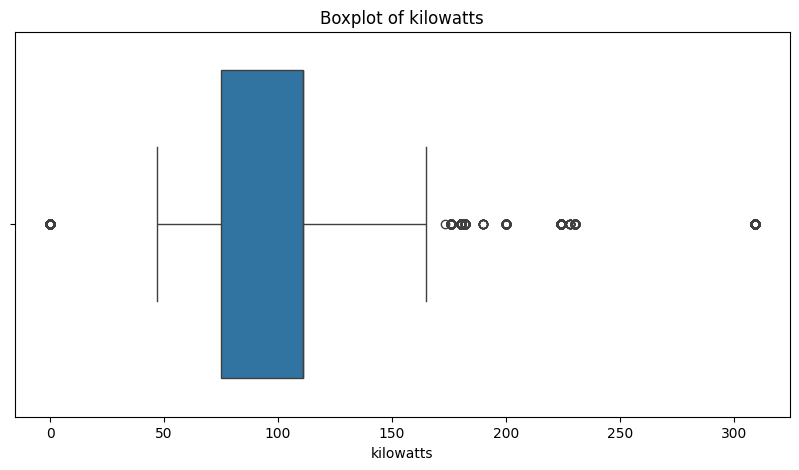

Outliers in kilowatts: 2175 records
         kilowatts
count  2175.000000
mean    180.432644
std      83.787669
min       0.000000
25%     180.000000
50%     182.000000
75%     224.000000
max     309.000000
--------------------------------------------------


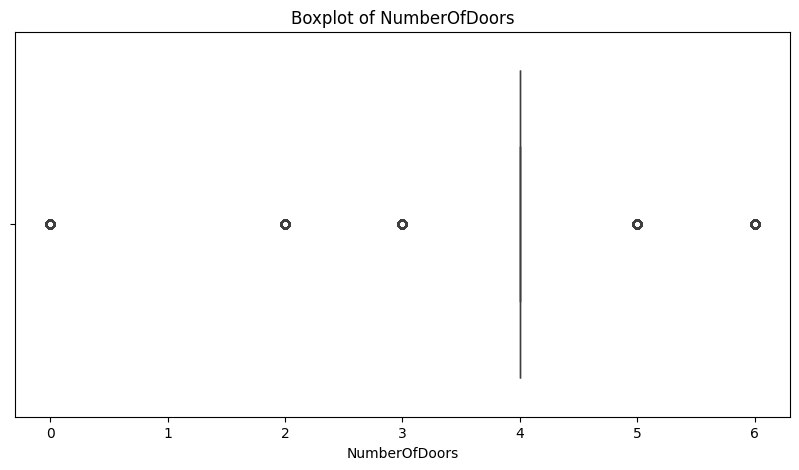

Outliers in NumberOfDoors: 106708 records
       NumberOfDoors
count  106708.000000
mean        4.180315
std         1.423150
min         0.000000
25%         2.000000
50%         5.000000
75%         5.000000
max         6.000000
--------------------------------------------------


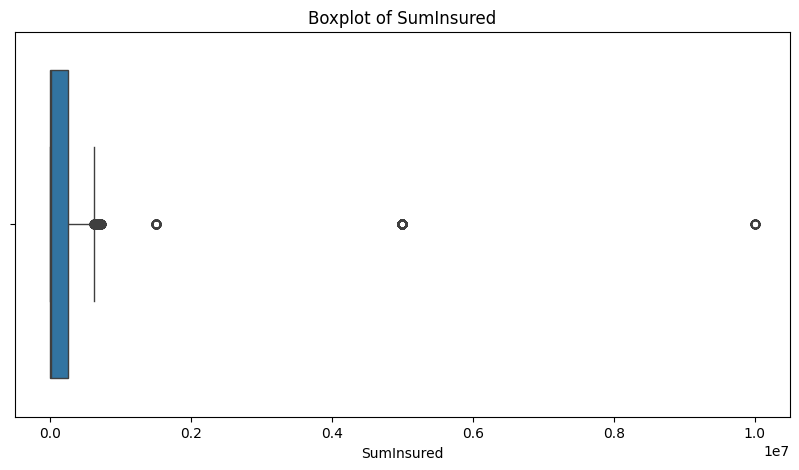

Outliers in SumInsured: 104202 records
         SumInsured
count  1.042020e+05
mean   4.994091e+06
std    1.953626e+05
min    6.250000e+05
25%    5.000000e+06
50%    5.000000e+06
75%    5.000000e+06
max    1.000000e+07
--------------------------------------------------


In [13]:



# Assuming df is already loaded with the columns from MachineLearningRating_v3.csv
# List of numerical columns to check for outliers
numerical_columns = ['CustomValueEstimate', 'CapitalOutstanding', 'TotalPremium', 
                     'TotalClaims', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 
                     'kilowatts', 'NumberOfDoors', 'SumInsured']

# Function to detect and visualize outliers using boxplots
def detect_outliers(df, columns):
    for col in columns:
        if col in df.columns:  # Check if column exists in DataFrame
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.show()
            
            # Identify outliers using IQR method
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Outliers in {col}: {len(outliers)} records")
            print(outliers[[col]].describe())
            print("-" * 50)

# Apply outlier detection to numerical columns
detect_outliers(df, numerical_columns)


## Remove/Cap Outliers

In [14]:


# Assuming df is the DataFrame with the columns
# Remove or cap outliers based on context
# RegistrationYear: Remove years < 1990
df = df[df['RegistrationYear'] >= 1990]

# NumberOfDoors: Remove values outside 2-5
df = df[df['NumberOfDoors'].between(2, 5)]

# CustomValueEstimate: Cap at 2.0e7
df['CustomValueEstimate'] = df['CustomValueEstimate'].clip(upper=2.0e7)

# CapitalOutstanding: Cap at 500,000
df['CapitalOutstanding'] = df['CapitalOutstanding'].clip(upper=500000)

# TotalPremium: Cap at 2,000
df['TotalPremium'] = df['TotalPremium'].clip(upper=2000)

# TotalClaims: Cap at 300,000
df['TotalClaims'] = df['TotalClaims'].clip(upper=300000)

# cubiccapacity: Cap at 10,000
df['cubiccapacity'] = df['cubiccapacity'].clip(upper=10000)

# kilowatts: Cap at 300
df['kilowatts'] = df['kilowatts'].clip(upper=300)

# SumInsured: Cap at 8.0e6
df['SumInsured'] = df['SumInsured'].clip(upper=8.0e6)

# Verify changes (optional)
print("Updated DataFrame info:")
print(df[['CustomValueEstimate', 'CapitalOutstanding', 'TotalPremium', 'TotalClaims', 
          'RegistrationYear', 'NumberOfDoors', 'cubiccapacity', 'kilowatts', 'SumInsured']].describe())

Updated DataFrame info:
       CustomValueEstimate  CapitalOutstanding   TotalPremium    TotalClaims  \
count         2.197860e+05       995950.000000  995950.000000  995950.000000   
mean          2.237730e+05         8470.066468      61.412095      64.290149   
std           4.784887e+05        46708.673194     156.988253    2338.591185   
min           2.000000e+04           -2.000000    -782.576754  -12002.412281   
25%           1.350000e+05            0.000000       0.000000       0.000000   
50%           2.200000e+05            0.000000       2.185000       0.000000   
75%           2.801000e+05            0.000000      21.929825       0.000000   
max           2.000000e+07       500000.000000    2000.000000  300000.000000   

       RegistrationYear  NumberOfDoors  cubiccapacity      kilowatts  \
count     995950.000000  995950.000000  995950.000000  995950.000000   
mean        2010.226189       4.024126    2467.080893      97.233790   
std            3.262307       0.425952 

## Loss Ratio by Province and Gender

/tmp/ipykernel_18825/3414260084.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


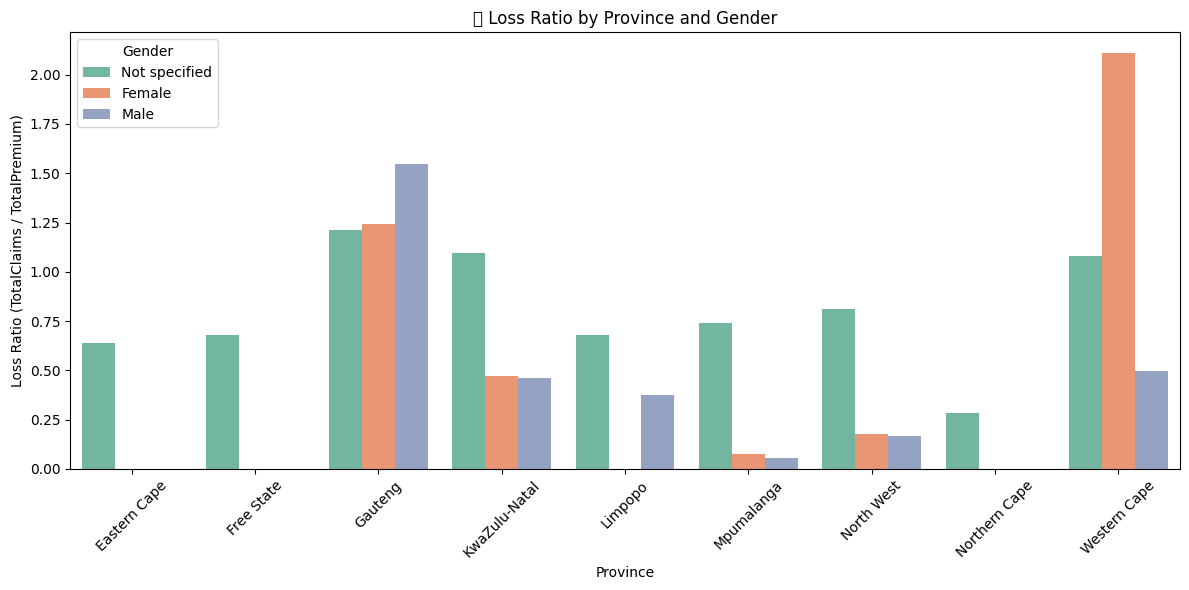

In [15]:
loss_ratio_df = df.groupby(['Province', 'Gender']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()
loss_ratio_df['LossRatio'] = loss_ratio_df['TotalClaims'] / loss_ratio_df['TotalPremium']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=loss_ratio_df,
    x='Province',
    y='LossRatio',
    hue='Gender',
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title("📊 Loss Ratio by Province and Gender")
plt.ylabel("Loss Ratio (TotalClaims / TotalPremium)")
plt.tight_layout()
plt.show()


## Loss Ratio Heatmap by Province and Vehicle Type

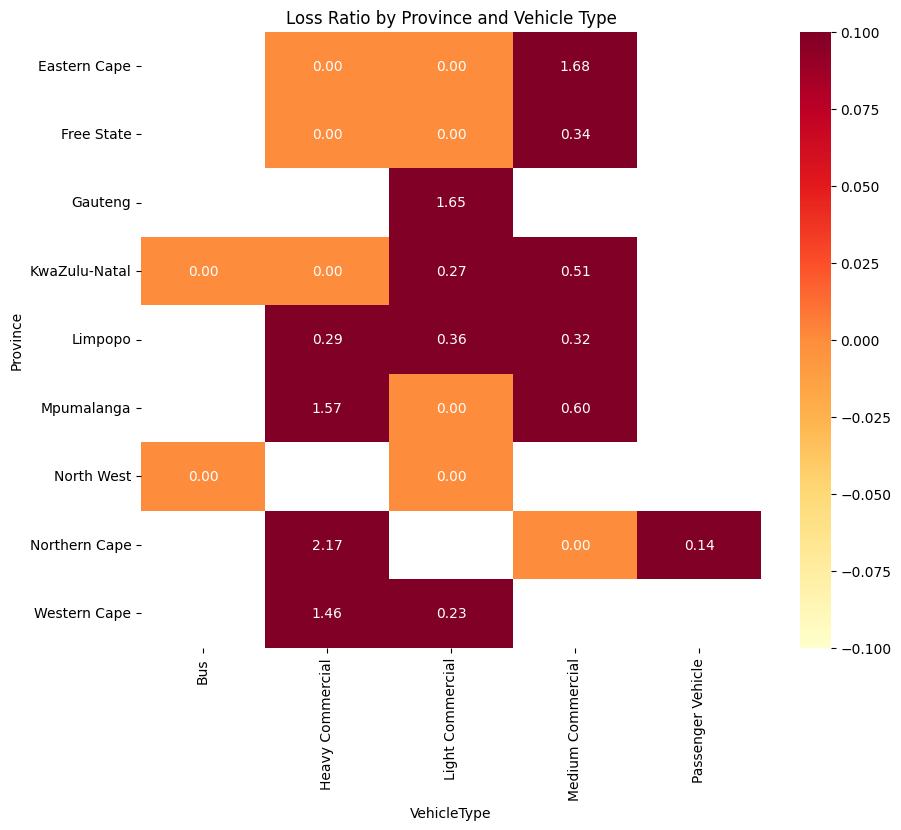

In [16]:
pivot_table = df.pivot_table(values='LossRatio', index='Province', columns='VehicleType', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Loss Ratio by Province and Vehicle Type')
#plt.savefig('../reports/figures/loss_ratio_heatmap.png')
plt.show()

## CustomValueEstimate vs TotalClaims (with Outlier Filtering)

/tmp/ipykernel_18825/3778720472.py:16: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


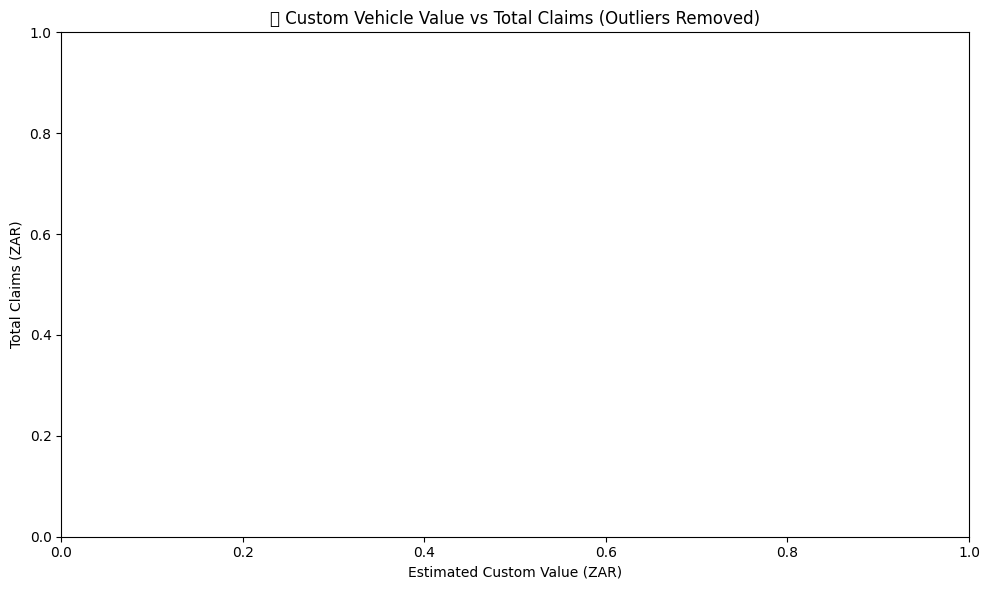

In [17]:
# Filter out extreme outliers to improve visualization
filtered_df = df[(df['CustomValueEstimate'] < df['CustomValueEstimate'].quantile(0.99)) &
                 (df['TotalClaims'] < df['TotalClaims'].quantile(0.99))]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='CustomValueEstimate',
    y='TotalClaims',
    hue='VehicleType',
    alpha=0.6
)
plt.title("🚘 Custom Vehicle Value vs Total Claims (Outliers Removed)")
plt.xlabel("Estimated Custom Value (ZAR)")
plt.ylabel("Total Claims (ZAR)")
plt.tight_layout()
plt.show()


## Loss Ratio by Car Make and Body Type

/tmp/ipykernel_18825/1039064479.py:22: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ablex/Development/AI/insurance-risk-analytics/myvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


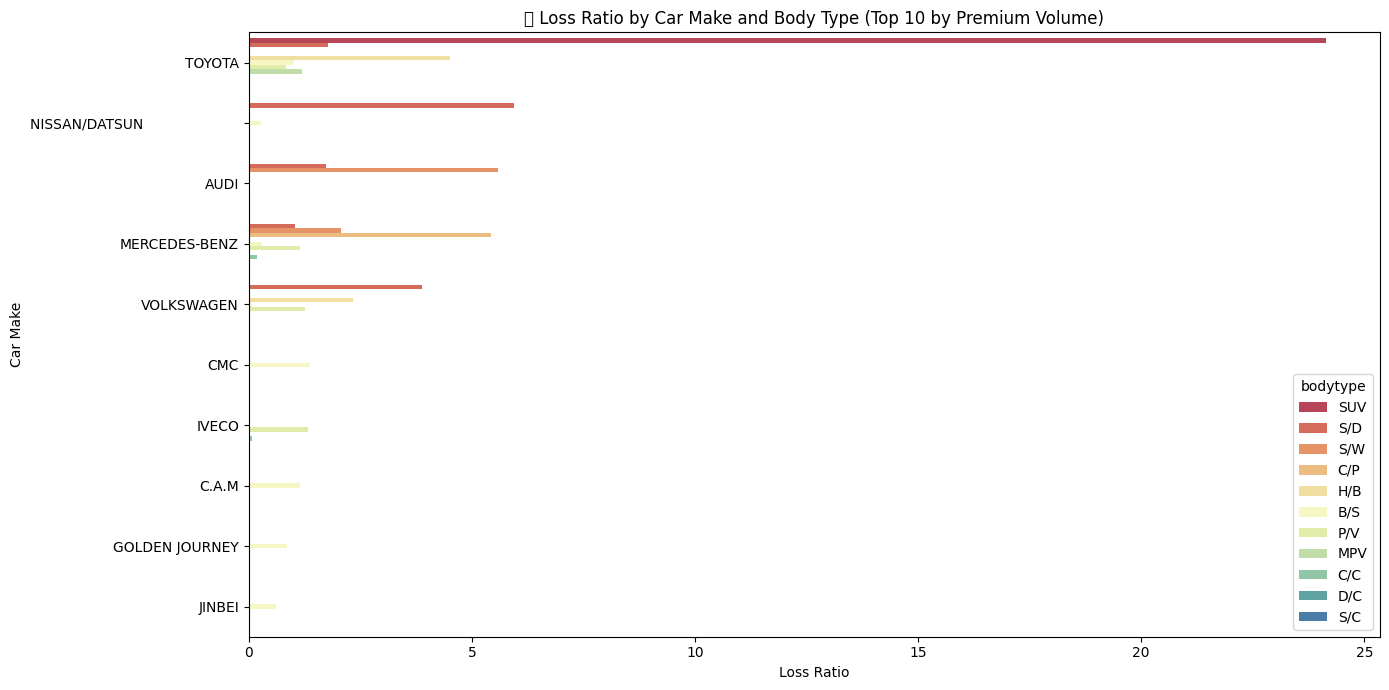

In [18]:
# Group by Make and BodyType, calculate Loss Ratio
make_body_loss = df.groupby(['make', 'bodytype']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

make_body_loss['LossRatio'] = make_body_loss['TotalClaims'] / make_body_loss['TotalPremium']
top_makes = make_body_loss.groupby('make')['TotalPremium'].sum().nlargest(10).index
filtered_loss = make_body_loss[make_body_loss['make'].isin(top_makes)]

plt.figure(figsize=(14, 7))
sns.barplot(
    data=filtered_loss.sort_values("LossRatio", ascending=False),
    x='LossRatio',
    y='make',
    hue='bodytype',
    palette='Spectral'
)
plt.title("🚗 Loss Ratio by Car Make and Body Type (Top 10 by Premium Volume)")
plt.xlabel("Loss Ratio")
plt.ylabel("Car Make")
plt.tight_layout()
plt.show()
